In [1]:
import pandas as pd
import nltk
from nltk.chunk import ne_chunk
from nltk.tag import pos_tag
from collections import Counter

In [2]:
combine_df = pd.read_pickle("../Lesson_01/data/combine_df.zip")

In [3]:
combine_df.head()

,id,label,tweet,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,1,0.0,@user when a father is dysfunctional and is s...,when father is dysfunctional and is so selfish...,"[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ...","[father, dysfunct, selfish, drag, kid, dysfunc...","[father, dysfunctional, selfish, drag, kid, dy..."
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit cannot use cause they d...,"[thanks, for, lyft, credit, can, not, use, cau...","[thanks, lyft, credit, use, cause, offer, whee...","[thank, lyft, credit, use, caus, offer, wheelc...","[thanks, lyft, credit, use, cause, offer, whee..."
2,3,0.0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]","[bihday, majesti]","[bihday, majesty]"
3,4,0.0,#model i love u take with u all the time in ...,model love you take with you all the time in ur,"[model, love, you, take, with, you, all, the, ...","[model, love, take, time, ur]","[model, love, take, time, ur]","[model, love, take, time, ur]"
4,5,0.0,factsguide: society now #motivation,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]","[factsguid, societi, motiv]","[factsguide, society, motivation]"


In [4]:
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/bocharick/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/bocharick/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/bocharick/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

### проверка вытаскивания NER с помощью nltk

In [5]:
text = "I think Barack Obama met founder of Facebook at occasion of a release of a new NLP algorithm."

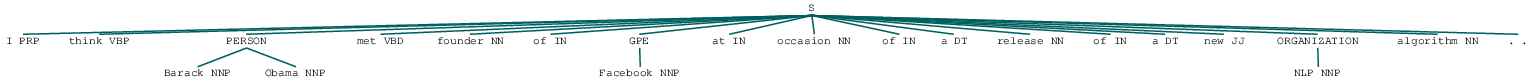

In [6]:
nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(text)))

In [7]:
ner_list = [(' '.join(c[0] for c in chunk), chunk.label() ) for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(text))) if hasattr(chunk, 'label') ]
ner_list

[('Barack Obama', 'PERSON'), ('Facebook', 'GPE'), ('NLP', 'ORGANIZATION')]

In [8]:
for entity in ner_list:
    print(entity)

('Barack Obama', 'PERSON')
('Facebook', 'GPE')
('NLP', 'ORGANIZATION')


### выполнение задания

In [9]:
cntr = Counter()
ents_dict = {}

In [10]:
%%time
for i in range(len(combine_df)):
    text = combine_df.iloc[i]["clean_tweet"]
    ner_list = [(' '.join(c[0] for c in chunk), chunk.label() ) for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(text))) if hasattr(chunk, 'label') ]
    for entity in ner_list:
        cntr[entity[0]] += 1
        if entity[0] not in ents_dict:
            ents_dict[entity[0]] = entity[1]
        else:
            if ents_dict[entity[0]] != entity[1]:
                print("ENTITIES MISMATCH:\n\tentity text: %s\n\tdict label: %s\n\tnew label: %s\n" % (entity[0], ents_dict[entity[0]], entity[1]))


CPU times: user 1min 58s, sys: 243 ms, total: 1min 59s
Wall time: 1min 59s


In [11]:
cntr.most_common(20)

[]

In [12]:
%%time
tmp_cntr = 0
popular_orgs_and_persons = []
for i, common in enumerate(cntr.most_common(10000)):
    word = common[0]
    count = common[1]
    ent_label = ents_dict[word]
    if ent_label == "PERSON" or ent_label == "ORG":
        popular_orgs_and_persons.append((word, ent_label, count))
    else:
        print(i, word, ent_label, count)
    if len(popular_orgs_and_persons) == 20:
        break

CPU times: user 7 µs, sys: 1 µs, total: 8 µs
Wall time: 8.11 µs


### В общем нифига не получилось, почему-то. Не видит nltk здесь лэйблы